# Data Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/SunbaseData/customer_churn_large_dataset.xlsx')

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.info()   # information about dtype and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum() # no missing data

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df['Location'].unique()   # to find unique data to encode and convert to numerical data

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [ ]:
df.duplicated().sum()     # no duplicated data

0

In [ ]:
# Visualizing Outliers

import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers():
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=df, x="Age", y="Churn")

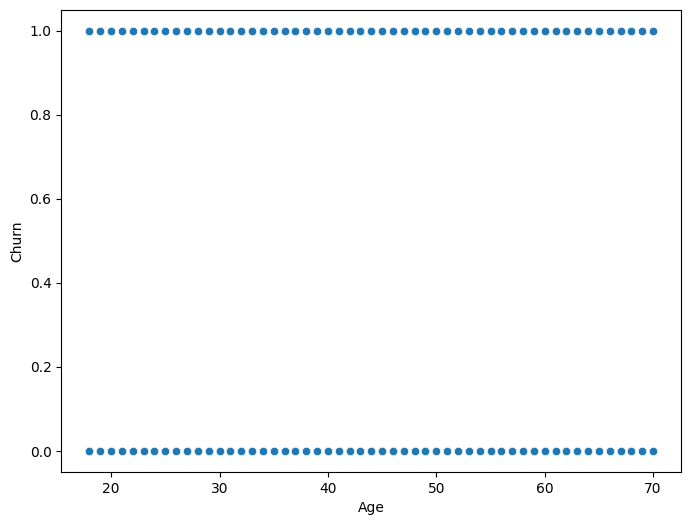

In [ ]:
visualize_outliers()

In [ ]:
df.corr() # to find the correlation between the columns

<ipython-input-11-5169f1a5a0e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # to find the correlation between the columns


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [ ]:
# Splitting dataset into independent and target variables

X = df.loc[: , ['Age', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']]
X

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Los Angeles,17,73.36,236
1,62,New York,1,48.76,172
2,24,Los Angeles,5,85.47,460
3,36,Miami,3,97.94,297
4,46,Miami,19,58.14,266
...,...,...,...,...,...
99995,33,Houston,23,55.13,226
99996,62,New York,19,61.65,351
99997,64,Chicago,17,96.11,251
99998,51,New York,20,49.25,434


In [ ]:
y = df.loc[:, 'Churn']
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [ ]:
# To find customer churn, the useful features are: Age, Subscription_length_months, monthly_bill, total_usage_gb, location
# Here location is not in the numerical form, so we need to convert it into the numerical form
# To convert location into numerical form, we perform encoding

# The best suited encoder to represent nominal data like city names is 'One Hot Encoder'

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[  0.  ,   0.  ,   1.  , ...,  17.  ,  73.36, 236.  ],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,  48.76, 172.  ],
       [  0.  ,   0.  ,   1.  , ...,   5.  ,  85.47, 460.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  17.  ,  96.11, 251.  ],
       [  0.  ,   0.  ,   0.  , ...,  20.  ,  49.25, 434.  ],
       [  0.  ,   0.  ,   1.  , ...,  19.  ,  76.57, 173.  ]])

In [ ]:
# Splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

array([[  1.  ,   0.  ,   0.  , ...,  17.  ,  98.37, 367.  ],
       [  0.  ,   0.  ,   1.  , ...,  22.  ,  77.27, 488.  ],
       [  0.  ,   1.  ,   0.  , ...,   5.  ,  92.77, 435.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  22.  ,  62.49,  73.  ],
       [  0.  ,   0.  ,   0.  , ...,   6.  ,  87.78, 318.  ],
       [  0.  ,   0.  ,   1.  , ...,   9.  ,  30.98, 427.  ]])

# Feature Engineering

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:, 6:] = sc.fit_transform(X_train[:, 6:])
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.65036231,
         1.64749894,  0.7147301 ],
       [ 0.        ,  0.        ,  1.        , ...,  1.37206092,
         0.60487841,  1.64225938],
       [ 0.        ,  1.        ,  0.        , ..., -1.08171436,
         1.37078449,  1.23598622],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.37206092,
        -0.1254501 , -1.53893606],
       [ 0.        ,  0.        ,  0.        , ..., -0.93737463,
         1.12421214,  0.33911907],
       [ 0.        ,  0.        ,  1.        , ..., -0.50435547,
        -1.68246303,  1.17466197]])

In [ ]:
X_test[:, 6:] = sc.fit_transform(X_test[:, 6:])
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -0.64650165,
        -1.26372767,  0.05422033],
       [ 0.        ,  0.        ,  0.        , ...,  0.22058747,
        -1.27313231,  0.42213535],
       [ 0.        ,  0.        ,  0.        , ..., -1.65810561,
         0.49296109, -1.65505154],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.06844223,
         0.40584438, -0.93455129],
       [ 0.        ,  0.        ,  0.        , ...,  1.665736  ,
         0.52414492,  0.65208223],
       [ 0.        ,  0.        ,  0.        , ..., -0.93553135,
         1.1161426 , -1.15683328]])

In [ ]:
y_train

78689    1
76423    0
86945    1
57427    0
34616    1
        ..
50057    0
98047    1
5192     1
77708    0
98539    1
Name: Churn, Length: 80000, dtype: int64

In [ ]:
y_test

43660    1
87278    1
14317    0
81932    0
95321    1
        ..
73441    0
1341     1
71987    1
26910    0
24890    0
Name: Churn, Length: 20000, dtype: int64

# Model Building

In [ ]:
# First we try with Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logistic_model.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = classification_report(y_test, predictions)
print(matrix)

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54     10020
           1       0.50      0.43      0.46      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

[[5796 4224]
 [5692 4288]]


In [ ]:
# SVC (Support Vector Classifier)

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

# Model Optimization - Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=4)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.501 total time= 6.1min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.500 total time= 6.2min
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.502 total time= 6.1min
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.503 total time= 6.2min
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.499 total time= 6.2min
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time= 4.5min
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time= 4.6min
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time= 4.6min
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time= 4.5min
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.497 total time= 4.5min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.500 total time= 4.4min
[CV 2/5] END .................C=0.1, gamma=0.01

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
classification_report(y_test, grid_predictions)